In [82]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/harry-potter-books/03 Harry Potter and the Prisoner of Azkaban.txt
/kaggle/input/harry-potter-books/06 Harry Potter and the Half-Blood Prince.txt
/kaggle/input/harry-potter-books/05 Harry Potter and the Order of the Phoenix.txt
/kaggle/input/harry-potter-books/02 Harry Potter and the Chamber of Secrets.txt
/kaggle/input/harry-potter-books/07 Harry Potter and the Deathly Hallows.txt
/kaggle/input/harry-potter-books/01 Harry Potter and the Sorcerers Stone.txt
/kaggle/input/harry-potter-books/04 Harry Potter and the Goblet of Fire.txt


In [83]:
pip install spacy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [85]:
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [112]:
import pandas as pd
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [87]:
file_path = '/kaggle/input/harry-potter-books/01 Harry Potter and the Sorcerers Stone.txt'
with open(file_path, 'r') as file:
    text = file.read()

In [88]:
nlp = spacy.load("en_core_web_trf")

def extract_human_names(text):
    doc = nlp(text)
    human_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return human_names

def remove_duplicates(names):
    seen = set()
    unique_names = []
    for name in names:
        if name not in seen:
            unique_names.append(name)
            seen.add(name)
    return unique_names

harry_potter_text = text

human_names = extract_human_names(harry_potter_text)
unique_human_names = remove_duplicates(human_names)
print(unique_human_names)

['Dursley', 'Dursleys', 'Dudley', 'Potters', 'Potter', 'Harry', 'Harvey', 'Harold', 'Jim McGuffin', 'Jim', 'Ted', 'Petunia', 'Howard', 'Albus Dumbledore', 'Dumbledore', 'McGonagall', 'Muggles', 'Dedalus Diggle', 'Voldemort', 'Pomfrey', 'Lily', 'James Potter', 'James', 'Albus', 'Harry Potter', 'Hagrid', 'Sirius Black', 'Sirius', 'Dudley Dursley', 'Duddy', 'Vernon', 'Uncle Vernon', 'Darling', 'Marge', 'Mummy', 'Daddy', 'Figg', 'Tibbles', 'Snowy', 'Paws', 'Tufty', 'Yvonne', 'Dinky Duddydums', 'Piers Polkiss', 'Piers', 'Uncle Vernon’s', 'DUDLEY', 'DURSLEY', 'Dennis', 'Malcolm', 'Gordon', 'Harry Hunting', 'Smeltings', 'Ickle Dudleykins', 'H. Potter', 'Dad', 'Rubeus Hagrid', 'Vernon Dursley', 'ALBUS DUMBLEDORE', 'Warlock', 'Minerva McGonagall', 'Gallopin', 'Gulpin', 'Reckon Dumbledore', 'McKinnons', 'Bones', 'Prewetts', 'James Potter’s', 'ALBUS', 'DIAGON ALLEY', 'Gringotts', 'Cornelius Fudge', 'Crikey', 'Miranda Goshawk', 'Bathilda Bagshot', 'Adalbert Waffling', 'Emeric Switch', 'Phyllida Sp

In [90]:
character_house = {
    'Harry': 'Gryffindor',
    'Albus Dumbledore': 'Gryffindor',
    'Dumbledore': 'Gryffindor',
    'McGonagall': 'Gryffindor',
    'Voldemort': 'Slytherin',
    'Lily': 'Gryffindor',
    'James Potter': 'Gryffindor',
    'James': 'Gryffindor',
    'Harry Potter': 'Gryffindor',
    'Hagrid': 'Gryffindor',
    'Sirius Black': 'Gryffindor',
    'Sirius': 'Gryffindor',
    'Rubeus Hagrid': 'Gryffindor',
    'ALBUS DUMBLEDORE': 'Gryffindor',
    'Minerva McGonagall': 'Gryffindor',
    'Slytherin': 'Slytherin',
    'Hufflepuff': 'Hufflepuff',
    'Ginny': 'Gryffindor',
    'Percy': 'Gryffindor',
    'Fred': 'Gryffindor',
    'George': 'Gryffindor',
    'Ron': 'Gryffindor',
    'Neville': 'Gryffindor',
    'Lee': 'Gryffindor',
    'Ron Weasley': 'Gryffindor',
    'Hermione Granger': 'Gryffindor',
    'Hermione': 'Gryffindor',
    'Crabbe': 'Slytherin',
    'Goyle': 'Slytherin',
    'Malfoy': 'Slytherin',
    'Draco Malfoy': 'Slytherin',
    'Hannah': 'Hufflepuff',
    'Seamus': 'Gryffindor',
    'GRYFFINDOR': 'Gryffindor',
    'Neville Longbottom': 'Gryffindor',
    'Percy the Prefect': 'Gryffindor',
    'Percy Weasley': 'Gryffindor',
    'Nicholas de Mimsy-Porpington': 'Gryffindor',
    'Nick': 'Gryffindor',
    'Nicholas de Mimsy': 'Gryffindor',
    'Seamus Finnigan': 'Gryffindor',
    'Gryffindors': 'Gryffindor',
    'Dean Thomas': 'Gryffindor',
    'Slytherins': 'Slytherin',
    'Hermione Granger’s': 'Gryffindor',
    'Parvati Patil': 'Gryffindor',
    'Longbottom': 'Gryffindor',
    'Pansy Parkinson': 'Slytherin',
    'Parvati': 'Gryffindor',
    'Oliver Wood': 'Gryffindor',
    'Charlie Weasley': 'Gryffindor',
    'Severus Snape': 'Slytherin',
    'Severus': 'Slytherin',
    'Angelina Johnson': 'Gryffindor',
    'Fred Weasley': 'Gryffindor',
    'Oliver': 'Gryffindor',
    'Marcus Flint': 'Slytherin',
    'Flint': 'Slytherin',
    'Alicia Spinnet': 'Gryffindor',
    'Oliver Wood’s': 'Gryffindor',
    'Johnson': 'Gryffindor',
    'Katie Bell': 'Gryffindor',
    'Angelina': 'Gryffindor',
    'Ronald Weasley': 'Gryffindor',
    'VOLDEMORT': 'Slytherin',
    'Ginny Weasley': 'Gryffindor'
}

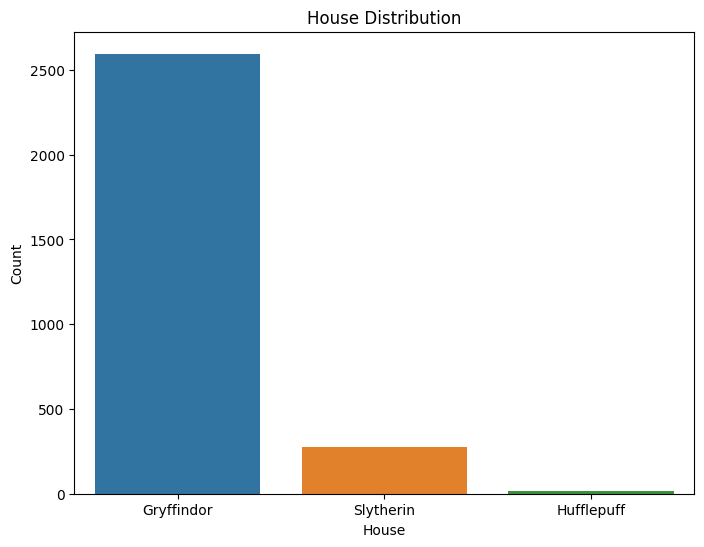

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='House', order=df['House'].value_counts().index)
plt.title('House Distribution')
plt.xlabel('House')
plt.ylabel('Count')
plt.show()

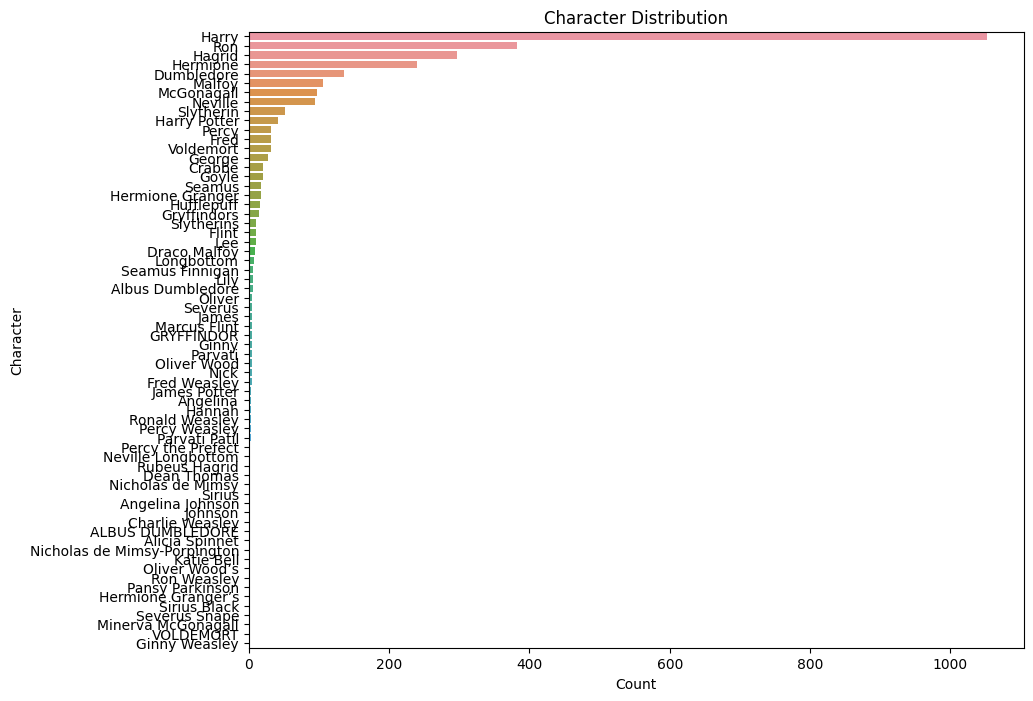

In [115]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Character', order=df['Character'].value_counts().index)
plt.title('Character Distribution')
plt.xlabel('Count')
plt.ylabel('Character')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


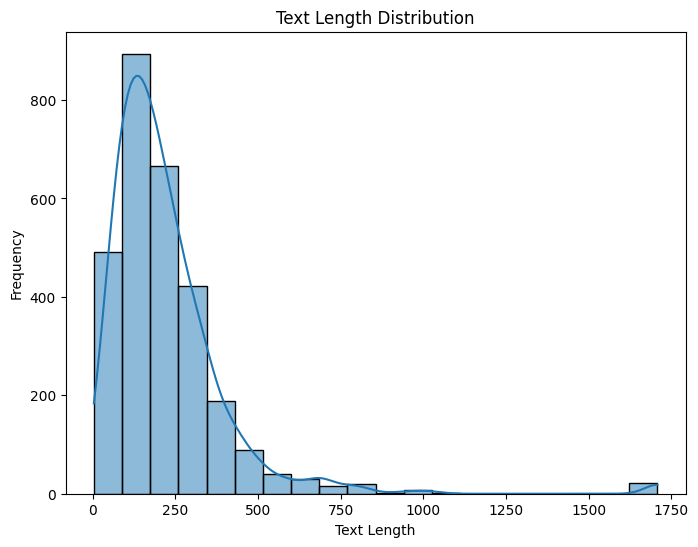

In [117]:
df['text_length'] = df['Sentence'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

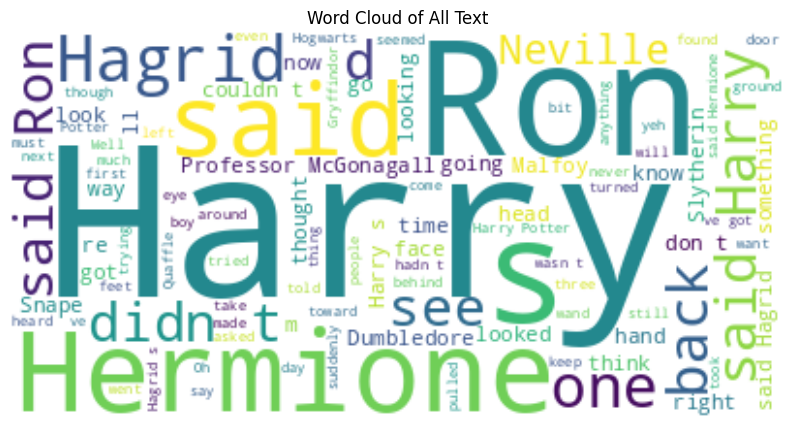

In [118]:
text = " ".join(review for review in df.Sentence)
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of All Text')
plt.show()

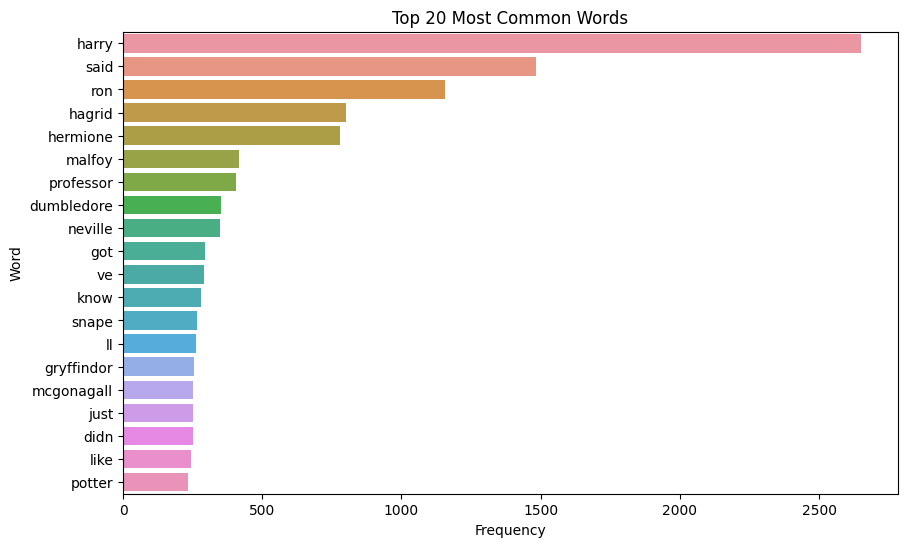

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Sentence'])
word_freq = np.sum(X.toarray(), axis=0)
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': word_freq})

word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df, x='frequency', y='word')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

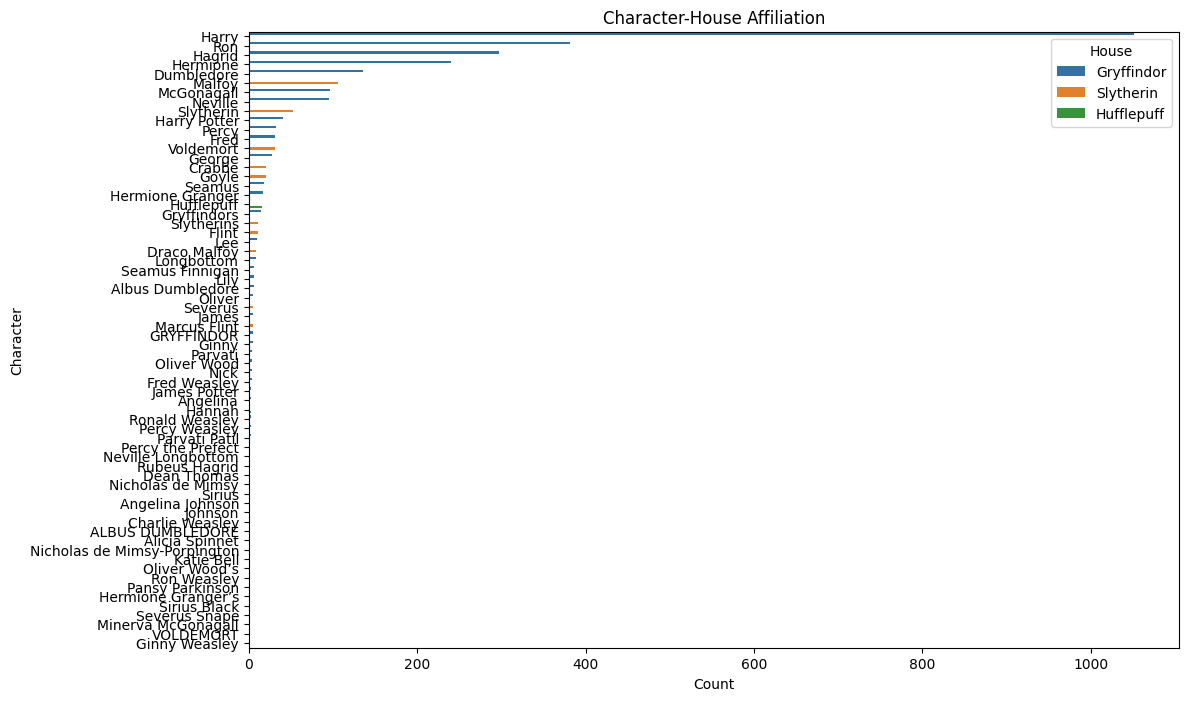

In [123]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Character', hue='House', order=df['Character'].value_counts().index)
plt.title('Character-House Affiliation')
plt.xlabel('Count')
plt.ylabel('Character')
plt.legend(title='House')
plt.show()

In [91]:
sentences = re.split(r'(?<=[.!?]) +', text)

char_sentences = defaultdict(list)
for sentence in sentences:
    for char in character_house.keys():
        if char in sentence:
            char_sentences[char].append(sentence)

In [92]:
data = []
for char, sentences in char_sentences.items():
    for sentence in sentences:
        data.append((char, character_house[char], sentence))

df = pd.DataFrame(data, columns=['Character', 'House', 'Sentence'])

In [93]:
df

,Character,House,Sentence
0,Harry,Gryffindor,"It was on his way back past them, clutching a ..."
1,Harry,Gryffindor,He was sure there were lots of people called P...
2,Harry,Gryffindor,"Come to think of it, he wasn’t even sure his n..."
3,Harry,Gryffindor,"Howard, isn’t it?”\n\n“Harry."
4,Harry,Gryffindor,They’re saying he tried to kill the Potter’s s...
...,...,...,...
2883,Ronald Weasley,Gryffindor,"Ronald Weasley, who has always been overshadow..."
2884,Ronald Weasley,Gryffindor,Ronald Weasley and Miss Granger will be most r...
2885,Ronald Weasley,Gryffindor,Ronald Weasley…”\n\nRon went purple in the fac...
2886,VOLDEMORT,Slytherin,“An’ don’ say the name!”\n\n“VOLDEMORT!” Harry...


In [95]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X = tfidf.fit_transform(df['Sentence'])
y = df['House']


In [96]:
X

<2888x4426 sparse matrix of type '<class 'numpy.float64'>'
	with 50543 stored elements in Compressed Sparse Row format>

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Gryffindor       0.92      0.95      0.93       518
  Hufflepuff       0.00      0.00      0.00         7
   Slytherin       0.36      0.28      0.32        53

    accuracy                           0.88       578
   macro avg       0.43      0.41      0.42       578
weighted avg       0.86      0.88      0.87       578



In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
df

,Character,House,Sentence
0,Harry,Gryffindor,"It was on his way back past them, clutching a ..."
1,Harry,Gryffindor,He was sure there were lots of people called P...
2,Harry,Gryffindor,"Come to think of it, he wasn’t even sure his n..."
3,Harry,Gryffindor,"Howard, isn’t it?”\n\n“Harry."
4,Harry,Gryffindor,They’re saying he tried to kill the Potter’s s...
...,...,...,...
2883,Ronald Weasley,Gryffindor,"Ronald Weasley, who has always been overshadow..."
2884,Ronald Weasley,Gryffindor,Ronald Weasley and Miss Granger will be most r...
2885,Ronald Weasley,Gryffindor,Ronald Weasley…”\n\nRon went purple in the fac...
2886,VOLDEMORT,Slytherin,“An’ don’ say the name!”\n\n“VOLDEMORT!” Harry...


In [102]:
label_encoder = LabelEncoder()
df['character_encoded'] = label_encoder.fit_transform(df['Character'])

vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['Sentence']).toarray()

X = torch.tensor(X_text, dtype=torch.float32)
y = torch.tensor(label_encoder.fit_transform(df['House']), dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
smote = SMOTE(random_state=42)

In [104]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [105]:
X_train_smote = torch.tensor(X_train_smote, dtype=torch.float32)
y_train_smote = torch.tensor(y_train_smote, dtype=torch.long)

In [106]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
    def forward(self, x):

        x = self.fc(x)
        return x

input_size = X_train.shape[1]
hidden_size = 64
output_size = len(df['House'].unique())

model = MLP(input_size, output_size)

In [107]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(X_train_smote)
    loss = criterion(outputs, y_train_smote)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [5/200], Loss: 1.0903
Epoch [10/200], Loss: 1.0344
Epoch [15/200], Loss: 0.9069
Epoch [20/200], Loss: 0.6853
Epoch [25/200], Loss: 0.4598
Epoch [30/200], Loss: 0.2882
Epoch [35/200], Loss: 0.1842
Epoch [40/200], Loss: 0.1474
Epoch [45/200], Loss: 0.1285
Epoch [50/200], Loss: 0.1227
Epoch [55/200], Loss: 0.1158
Epoch [60/200], Loss: 0.1130
Epoch [65/200], Loss: 0.1130
Epoch [70/200], Loss: 0.1087
Epoch [75/200], Loss: 0.1086
Epoch [80/200], Loss: 0.1067
Epoch [85/200], Loss: 0.1066
Epoch [90/200], Loss: 0.1036
Epoch [95/200], Loss: 0.1041
Epoch [100/200], Loss: 0.1020
Epoch [105/200], Loss: 0.0999
Epoch [110/200], Loss: 0.0999
Epoch [115/200], Loss: 0.0994
Epoch [120/200], Loss: 0.0974
Epoch [125/200], Loss: 0.0962
Epoch [130/200], Loss: 0.0963
Epoch [135/200], Loss: 0.0964
Epoch [140/200], Loss: 0.0962
Epoch [145/200], Loss: 0.0950
Epoch [150/200], Loss: 0.0959
Epoch [155/200], Loss: 0.0947
Epoch [160/200], Loss: 0.0925
Epoch [165/200], Loss: 0.0942
Epoch [170/200], Loss: 0.0915


In [108]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.95%


In [109]:
print(classification_report(y_test, predicted, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

  Gryffindor       0.94      0.90      0.92       518
  Hufflepuff       0.25      0.29      0.27         7
   Slytherin       0.30      0.43      0.36        53

    accuracy                           0.85       578
   macro avg       0.50      0.54      0.51       578
weighted avg       0.88      0.85      0.86       578

